<a href="https://colab.research.google.com/github/torchflash/MMAI831-Team-Project/blob/main/MMAI831_AI_in_Marketing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url = '/content/drive/MyDrive/Dataset.xlsx'
df = pd.read_excel(url,sheet_name='Format')

In [4]:
df

,User,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,...,20-6,20-7,20-8,20-9,20-10,20-11,20-12,20-13,20-14,20-15
0,U0001,1,2,-2,0,-1,0,-2,2,-1,...,1,1,1,1,1,1,1,1,1,1
1,U0002,2,0,2,-2,-1,-1,2,0,2,...,1,2,2,1,1,1,1,1,1,1
2,U0003,-1,2,0,2,0,2,-1,2,-1,...,1,1,1,1,1,1,1,1,4,1
3,U0004,1,1,-1,0,-1,0,-1,1,0,...,1,1,1,1,1,1,1,1,1,1
4,U0005,1,2,1,1,-1,0,0,2,0,...,1,1,1,1,1,1,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,U0116,1,-2,1,-1,-1,-1,2,1,2,...,1,1,4,1,1,1,1,1,1,1
116,U0117,1,2,-2,1,0,-1,-1,2,-1,...,1,1,2,1,1,3,2,1,2,1
117,U0118,1,1,2,1,0,-1,0,0,1,...,3,3,2,1,2,2,1,1,3,1
118,U0119,1,1,-1,-1,-1,1,1,1,1,...,3,3,3,2,3,3,3,3,3,3


In [5]:
df['Openness to Experience'] = df[['Q 1', 'Q 6']].sum(axis=1)
df['Conscientiousness'] = df[['Q 2', 'Q 7']].sum(axis=1)
df['Extraversion'] = df[['Q 3', 'Q 8']].sum(axis=1)
df['Agreeableness'] = df[['Q 4', 'Q 9']].sum(axis=1)
df['Neuroticism'] = df[['Q 5', 'Q 10']].sum(axis=1)

df = df.drop(df.columns[1:33], axis=1)

df

,User,Gender,Age,Paypal,Type of Job,Weekly working hours,Income,Home country,Home town,Cap/Zip-Code,...,20-11,20-12,20-13,20-14,20-15,Openness to Experience,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,U0001,F,62,hidden@comcast.net,Housewife/Househusband,Full Time,1,United States of America,Apollo,15613,...,1,1,1,1,1,1,0,0,-1,0
1,U0002,F,26,hidden@gmail.com,Contract employment,Full Time,1,United States of America,Chicago,60638,...,1,1,1,1,1,1,2,2,0,0
2,U0003,M,22,hidden@uwosh.edu,Contract employment,Full Time,1,United States of America,Greenville,54942,...,1,1,1,4,1,1,1,2,1,2
3,U0004,F,24,hidden@hotmail.co.uk,Student,Part Time,1,Great Britain,London,NW1 1EU,...,1,1,1,1,1,1,0,0,0,0
4,U0005,F,34,hidden@email.cz,Contract employment,Full Time,1,Czech Republic,Prague,10000,...,1,1,1,3,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,U0116,F,28,hidden@yahoo.com,Contract employment,Full Time,2,United States of America,Colorado,80031,...,1,1,1,1,1,0,0,2,1,-2
116,U0117,F,55,hidden@hotmail.com,Self-employment,Full Time,2,United States of America,Bellflower,90706,...,3,2,1,2,1,0,1,0,0,-1
117,U0118,F,18,hidden@yahoo.com,Student,Full Time,2,United States of America,San Mateo,94401-2727,...,2,1,1,3,1,0,1,2,2,1
118,U0119,F,61,hidden@hush.ai,Temporary,Part Time,1,Canada,Toronto,M5S1R8,...,3,3,3,3,3,2,2,0,0,0


In [6]:
df = df.drop(columns=['Home town', 'Cap/Zip-Code', 'Countries visited'])

In [7]:
df

,User,Gender,Age,Paypal,Type of Job,Weekly working hours,Income,Home country,Timepass,Fave Sports,...,20-11,20-12,20-13,20-14,20-15,Openness to Experience,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,U0001,F,62,hidden@comcast.net,Housewife/Househusband,Full Time,1,United States of America,Internet,I do not like Sports,...,1,1,1,1,1,1,0,0,-1,0
1,U0002,F,26,hidden@gmail.com,Contract employment,Full Time,1,United States of America,Internet,Nothing,...,1,1,1,1,1,1,2,2,0,0
2,U0003,M,22,hidden@uwosh.edu,Contract employment,Full Time,1,United States of America,Sports,"Team sports (Footbal, Baseball, Rugby, ...)",...,1,1,1,4,1,1,1,2,1,2
3,U0004,F,24,hidden@hotmail.co.uk,Student,Part Time,1,Great Britain,Internet,"Individual sports‎ (Tennis, Archery, ...)",...,1,1,1,1,1,1,0,0,0,0
4,U0005,F,34,hidden@email.cz,Contract employment,Full Time,1,Czech Republic,Sports,"Individual sports‎ (Tennis, Archery, ...)",...,1,1,1,3,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,U0116,F,28,hidden@yahoo.com,Contract employment,Full Time,2,United States of America,Reading,I do not like Sports,...,1,1,1,1,1,0,0,2,1,-2
116,U0117,F,55,hidden@hotmail.com,Self-employment,Full Time,2,United States of America,Internet,"Olympic sports‎, Equestrian sports‎, Motor spo...",...,3,2,1,2,1,0,1,0,0,-1
117,U0118,F,18,hidden@yahoo.com,Student,Full Time,2,United States of America,Reading,I do not like Sports,...,2,1,1,3,1,0,1,2,2,1
118,U0119,F,61,hidden@hush.ai,Temporary,Part Time,1,Canada,Movie,Other,...,3,3,3,3,3,2,2,0,0,0


In [8]:
unique_categories = df['Most visited websites'].unique()
print(unique_categories)

['Media (Books, DVD, CD/DVD Music) sites, Grocery &amp; beverages sites, Pet supplies sites'
 'Toys &amp; games sites, Console &amp; video games sites'
 'Sports &amp; outdoor sites, Media (Books, DVD, CD/DVD Music) sites'
 'Stationery &amp; office supplies sites, Clothing &amp; shoes sites, Health &amp; Beauty sites, Home stuffs sites'
 'Consumer electronics sites, Clothing &amp; shoes sites, Outdoor Living sites, Home stuffs sites, Jewellery &amp; watches sites, Computer software sites, Sports &amp; outdoor sites'
 'Clothing &amp; shoes sites' 'Media (Books, DVD, CD/DVD Music) sites'
 'Console &amp; video games sites, Clothing &amp; shoes sites, Toys &amp; games sites'
 'Clothing &amp; shoes sites, Health &amp; Beauty sites, Jewellery &amp; watches sites'
 'Grocery &amp; beverages sites, Clothing &amp; shoes sites, Health &amp; Beauty sites'
 'Computer software sites, Automotive sites' 'Sports &amp; outdoor sites'
 'Clothing &amp; shoes sites, Console &amp; video games sites, Health &

In [9]:
df['Most visited websites'] = df['Most visited websites'].str.replace("amp;", "")
df['Most visited websites'] = df['Most visited websites'].str.replace(" sites", "")
df['Most visited websites'] = df['Most visited websites'].str.replace("Books, DVD, CD/DVD Music", "BMVD")


In [10]:
df['Most visited websites'][22]

'Media (BMVD), Dating'

In [11]:
categories = pd.read_excel(url,sheet_name='Categories')
categories = categories.transpose()
unique_values = categories.iloc[1].unique().tolist()
unique_values.append('Clothing & Shoes')
unique_values = ['Media' if x == 'Media (BMVD)' else x for x in unique_values]
unique_values = ['Home' if x == 'Kitchen & Home' else x for x in unique_values]
unique_values = ['Office' if x == 'Office Products' else x for x in unique_values]
unique_values = ['Dating' if x == 'Dating Sites' else x for x in unique_values]
unique_values = ['Sports' if x == 'Sports & Outdoors' else x for x in unique_values]
unique_values = ['living' if x == 'Garden & Outdoor living' else x for x in unique_values]
unique_values = ['Tools' if x == 'DIY & Tools' else x for x in unique_values]

unique_values

['Automotive',
 'Baby Products',
 'Health & Beauty',
 'Media',
 'Consumer Electronics',
 'Console & Video Games',
 'Tools',
 'living',
 'Grocery',
 'Home',
 'Betting',
 'Jewellery & Watches',
 'Musical Instruments',
 'Office',
 'Pet Supplies',
 'Computer Software',
 'Sports',
 'Toys & Games',
 'Dating',
 'Clothing & Shoes']

In [12]:
for category in unique_values:
    df[category] = df['Most visited websites'].str.contains(category, case=False).astype(int)

In [13]:
df['Dating']

0      0
1      0
2      0
3      0
4      0
      ..
115    0
116    0
117    0
118    0
119    0
Name: Dating, Length: 120, dtype: int64

In [14]:
column_counts = df.iloc[:, -20:].apply(pd.Series.value_counts)

# Print the counts
print(column_counts)

   Automotive  Baby Products  Health & Beauty  Media  Consumer Electronics  \
0         113            114               73     79                    98   
1           7              6               47     41                    22   

   Console & Video Games  Tools  living  Grocery  Home  Betting  \
0                     92    109     107      105   104      111   
1                     28     11      13       15    16        9   

   Jewellery & Watches  Musical Instruments  Office  Pet Supplies  \
0                  105                  115     111           108   
1                   15                    5       9            12   

   Computer Software  Sports  Toys & Games  Dating  Clothing & Shoes  
0                104     105           108     111                70  
1                 16      15            12       9                50  


In [15]:
seed = 18

train_df = df.sample(frac=0.8, random_state=seed)
remaining_df = df.drop(train_df.index)
validation_df = remaining_df.sample(frac=0.5, random_state=seed)
test_df = remaining_df.drop(validation_df.index)

In [16]:
train_df

,User,Gender,Age,Paypal,Type of Job,Weekly working hours,Income,Home country,Timepass,Fave Sports,...,Betting,Jewellery & Watches,Musical Instruments,Office,Pet Supplies,Computer Software,Sports,Toys & Games,Dating,Clothing & Shoes
74,U0075,F,21,hidden@gmail.com,Contract employment,Full Time,1,United Kingdom,Internet,"Team sports (Footbal, Baseball, Rugby, ...) , ...",...,1,0,0,1,0,0,0,0,1,1
109,U0110,F,52,hidden@HOTMAIL.COM,Contract employment,Full Time,3,United States of America,Reading,"Individual sports‎ (Tennis, Archery, ...), Tea...",...,0,0,0,0,0,0,0,0,0,1
119,U0120,M,33,hidden@gmail.com,Consulting,Full Time,2,United States of America,Reading,"Individual sports‎ (Tennis, Archery, ...), Tea...",...,0,0,0,0,0,0,0,0,0,0
43,U0044,M,22,hidden@iastate.edu,Student,Part Time,2,United States of America,Movie,"Team sports (Footbal, Baseball, Rugby, ...)",...,0,0,0,0,0,0,0,0,0,1
45,U0046,F,32,hidden@yahoo.com,Self-employment,Full Time,1,United States of America,Reading,"Individual sports‎ (Tennis, Archery, ...), Tea...",...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,U0019,M,55,hidden@gmail.com,Odd job,Part Time,1,United States of America,Reading,"Individual sports‎ (Tennis, Archery, ...)",...,0,0,0,0,0,1,0,0,0,0
112,U0113,M,23,hidden@uw.edu,Student,Full Time,2,United States of America,Sports,"Individual sports‎ (Tennis, Archery, ...), Tea...",...,0,0,0,0,0,0,0,0,0,1
13,U0014,M,20,hidden@gmail.com,Student,Full Time,0,Saudi Arabia,Internet,"Individual sports‎ (Tennis, Archery, ...), Tea...",...,0,0,0,0,0,0,1,0,0,0
107,U0108,F,35,hidden@gmail.com,Contract employment,Full Time,3,United States of America,Reading,"Team sports (Footbal, Baseball, Rugby, ...)",...,0,0,0,0,0,0,0,0,0,1


In [17]:
frequency_df = train_df.iloc[:, -20:].sum().sort_values(ascending=False)
print("Frequency Distribution:")
print(frequency_df)

Frequency Distribution:
Clothing & Shoes         41
Health & Beauty          33
Media                    33
Console & Video Games    24
Consumer Electronics     15
Jewellery & Watches      14
Grocery                  13
Home                     12
Computer Software        12
Toys & Games             11
living                   11
Sports                   11
Pet Supplies              9
Betting                   9
Tools                     9
Office                    7
Dating                    6
Baby Products             5
Automotive                5
Musical Instruments       4
dtype: int64


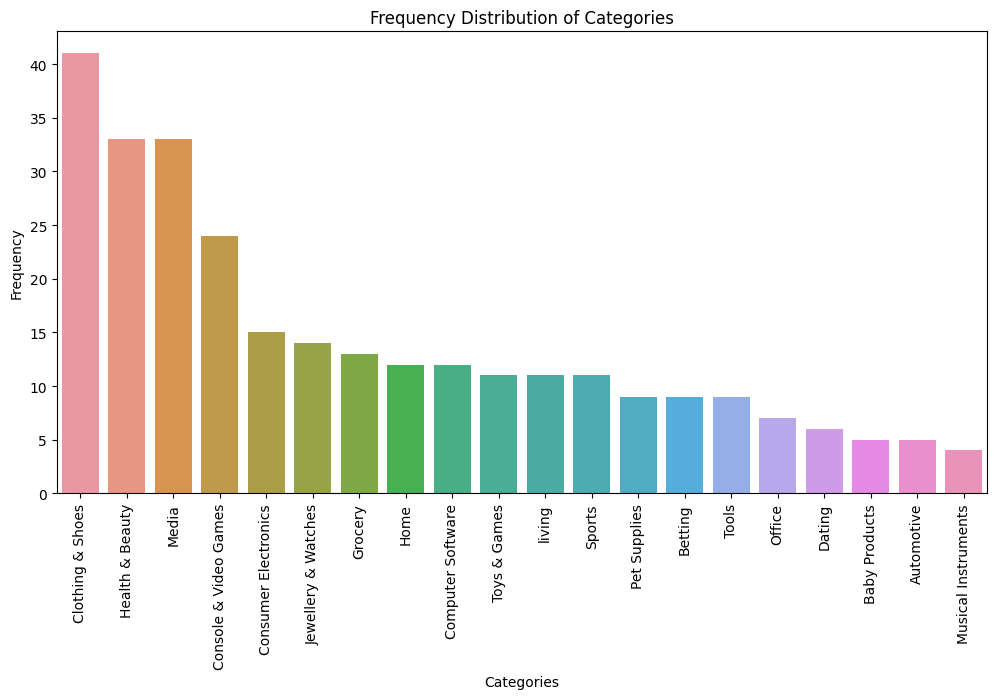

In [18]:
# Bar Plot for Frequency Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=frequency_df.index, y=frequency_df.values)
plt.xticks(rotation=90)
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Categories")
plt.show()

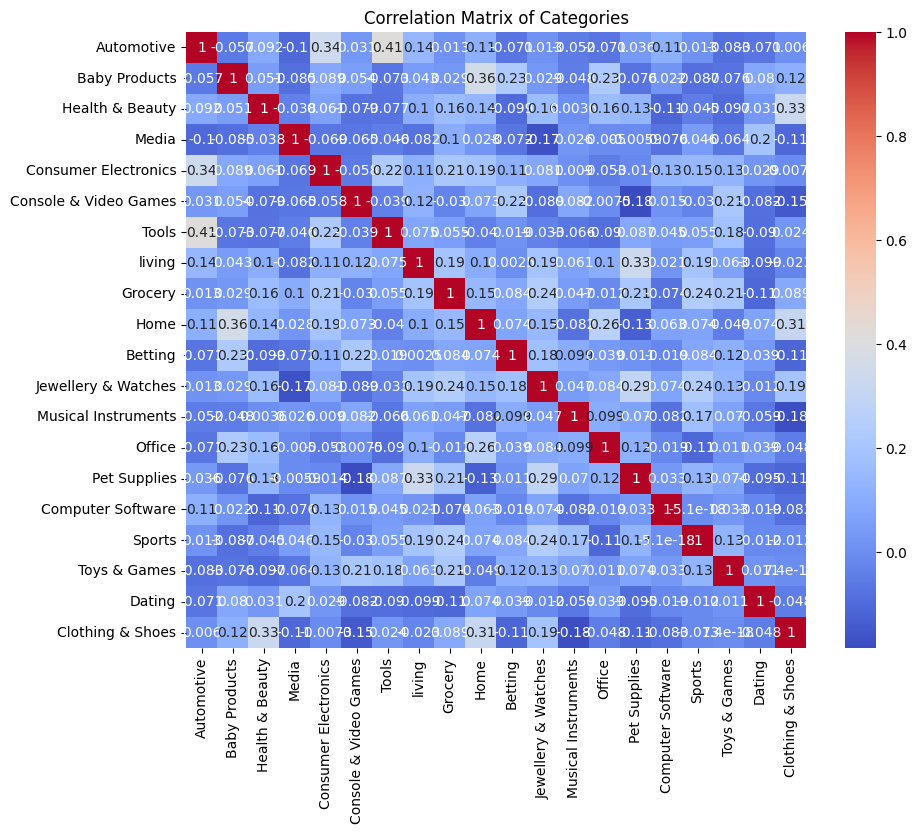

In [19]:
# Correlation Analysis
correlation_matrix = df.iloc[:, -20:].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Categories")
plt.show()


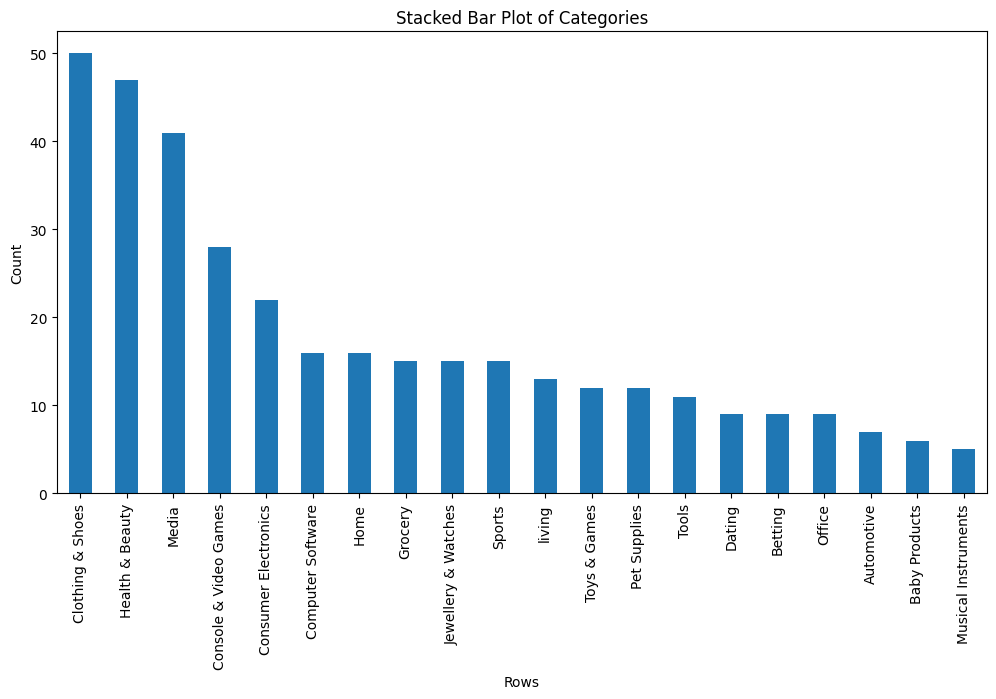

In [20]:
# Visualization - Stacked Bar Plot
category_counts = df.iloc[:, -20:].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_counts.plot(kind="bar", stacked=True)
plt.xlabel("Rows")
plt.ylabel("Count")
plt.title("Stacked Bar Plot of Categories")
plt.show()

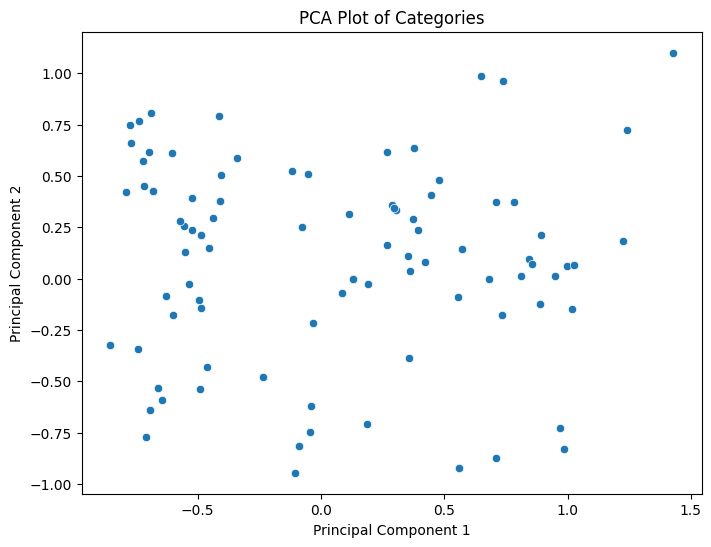

In [21]:
# Dimensionality Reduction - PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:, -20:])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Plot of Categories")
plt.show()

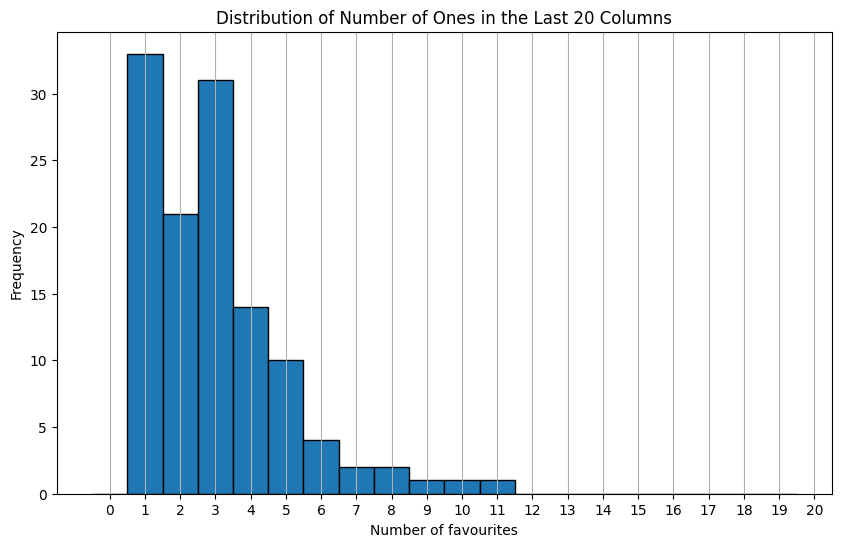

In [23]:
ones_counts = df.iloc[:, -20:].sum(axis=1)

# Plot the distribution
plt.figure(figsize=(10, 6))
ones_counts.hist(bins=range(21), edgecolor='black', align='left')
plt.xlabel("Number of favourites")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Ones in the Last 20 Columns")
plt.xticks(range(21))
plt.grid(axis='y')
plt.show()